In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# imbalance tool
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:
path = r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\data\ai4i2020.csv"
df=pd.read_csv(path)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

# **Model 1: Machine Failure Prediction (Binary)**

In [7]:
# Feature engineering
df["temp_diff"] = df["Process temperature [K]"] - df["Air temperature [K]"]
df["rot_speed_rad"] = df["Rotational speed [rpm]"] * (2 * np.pi / 60)
df["calc_power"] = df["Torque [Nm]"] * df["rot_speed_rad"]

In [8]:
# Target (binary)
y_bin = df["Machine failure"].astype(int)
X_bin = df[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]",
            "Tool wear [min]", "Type", "temp_diff", "calc_power"]]

In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_bin, y_bin, test_size=0.2, stratify=y_bin, random_state=7
)

In [10]:
# Columns
num_features = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]",
                "Torque [Nm]", "Tool wear [min]", "temp_diff", "calc_power"]
cat_features = ["Type"]

In [11]:
# Preprocessing
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(), cat_features)
])

In [12]:
# Pipeline with SMOTE
clf_bin = ImbPipeline([
    ("prep", preprocess),
    ("smote", SMOTE(random_state=7)),
    ("model", RandomForestClassifier(n_estimators=150, random_state=7))
])

In [13]:
# Fit
clf_bin.fit(X_train, y_train)
probs = clf_bin.predict_proba(X_test)[:, 1]

In [14]:
# Evaluate
ap = average_precision_score(y_test, probs)
print("Average Precision:", ap)

prec, rec, thr = precision_recall_curve(y_test, probs)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-10)
best_idx = np.argmax(f1_scores)
chosen_thr = thr[best_idx-1] if best_idx > 0 else 0.5

y_pred = (probs >= chosen_thr).astype(int)
print("Chosen Threshold:", chosen_thr)
print(classification_report(y_test, y_pred))

Average Precision: 0.8712812441874485
Chosen Threshold: 0.6266666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.90      0.78      0.83        68

    accuracy                           0.99      2000
   macro avg       0.95      0.89      0.91      2000
weighted avg       0.99      0.99      0.99      2000



# **Model 2: Failure Type Classification (Multiclass)**

In [15]:
# Failure type construction
fail_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

def get_failure_type(row):
    for col in fail_cols:
        if row[col] == 1:
            return col
    return "NoFailure"

df["failure_mode"] = df.apply(get_failure_type, axis=1)

In [16]:
# Features & Target
X_multi = X_bin
y_multi = df["failure_mode"]

In [17]:
# Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, stratify=y_multi, test_size=0.25, random_state=11
)

In [18]:
# Preprocessing
prep_multi = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(), cat_features)
])

In [19]:
# Decision Tree classifier
clf_multi = Pipeline([
    ("prep", prep_multi),
    ("tree", DecisionTreeClassifier(max_depth=7, class_weight="balanced", random_state=11))
])

In [20]:
# Train & predict
clf_multi.fit(X_train_m, y_train_m)
y_pred_m = clf_multi.predict(X_test_m)

In [21]:
# Report
print(classification_report(y_test_m, y_pred_m))

              precision    recall  f1-score   support

         HDF       0.96      0.90      0.93        29
   NoFailure       0.99      0.77      0.87      2413
         OSF       0.23      0.79      0.35        19
         PWF       0.90      0.83      0.86        23
         RNF       0.00      0.40      0.01         5
         TWF       0.05      0.45      0.08        11

    accuracy                           0.77      2500
   macro avg       0.52      0.69      0.52      2500
weighted avg       0.98      0.77      0.86      2500



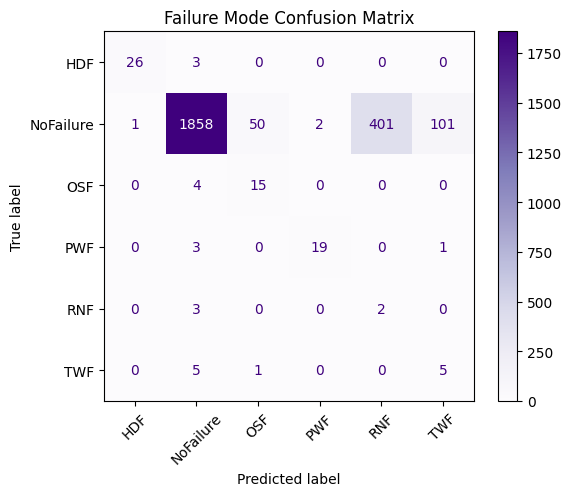

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test_m, y_pred_m, labels=clf_multi.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_multi.classes_)
disp.plot(cmap="Purples", xticks_rotation=45)
plt.title("Failure Mode Confusion Matrix")
plt.show()